<a href="https://colab.research.google.com/github/AadarshPandey29/Loan-Prediciton/blob/main/Loan_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries Required.

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

Loading the data

In [13]:
loan_data = pd.read_csv("/content/drive/MyDrive/Datasets/Loan Prediction System.csv")
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
# Printing of the first 5 rows of the dataset.
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
loan_data.shape

(614, 13)

In [16]:
# statistical values for our data
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
# Searching for the null or missing values in the data.
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#Dropping the missing values from the table 
loan_data = loan_data.dropna()

In [19]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Label Encoding
loan_data.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace = True)

In [27]:
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [28]:
# Dependent Column values
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# Replacing 3+ values to 4.
loan_data.replace({'Dependents':{'3+' : 4}}, inplace = True)

In [34]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

**Data** **Visualisation**

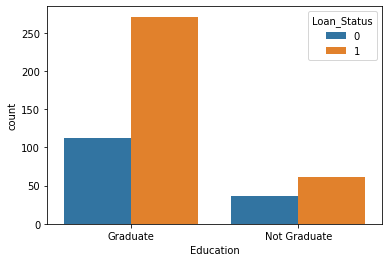

In [35]:
# Checking the education and the loan status
sns.countplot(x = 'Education', hue = 'Loan_Status', data=loan_data)

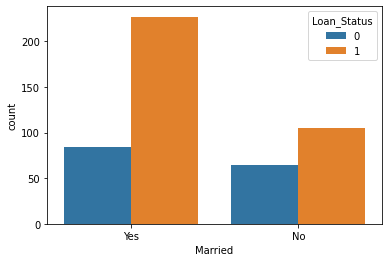

In [37]:
# Visualisation for marital stauts
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_data)

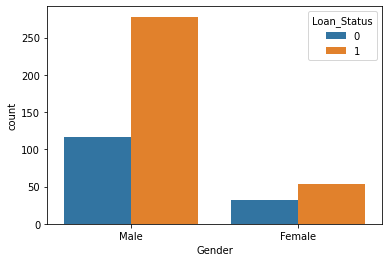

In [38]:
# Visualisation for Gender
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_data)

In [ ]:
# Label Encoding For Education, Gender, Married, Self_employed, Property_Area
loan_data.replace({'Married':{'No':0, 'Yes':1}, 'Education': {'Graduate':1, 'Not Graduate':0}, 'Gender':{'Male': 1, 'Female':0},
                   'Self_Employed':{'Yes':1, 'No': 1}, 'Property_Area':{'Rural': 0, 'Semiurban': 2, 'Urban': 1}}, inplace = True)

In [50]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,1,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,1,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,1,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,1,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,1,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,1,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,1,7583,0.0,187.0,360.0,1.0,2,1


In [51]:
# Getting values for property area
loan_data['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

In [59]:
# Seperating the label from the data and removing Loan_ID column from the data and storing the label data into Y var
X = loan_data.drop(columns = ['Loan_Status', 'Loan_ID'], axis = 1)
Y = loan_data['Loan_Status']

In [60]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              1             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              1             2583   
4         1        0          0          1              1             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              1             2900   
610       1        1          4          1              1             4106   
611       1        1          1          1              1             8072   
612       1        1          2          1              1             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Training and Testing the data**

In [63]:
# Splitting into training and testing the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, stratify = Y , random_state= 2)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


**Training the Model using Support Vector Machine Model **

In [65]:
classifier = svm.SVC(kernel='linear')

In [66]:
# Training the support vector machine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [70]:
# Accuracy Score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data is:",training_data_accuracy)

Accuracy on training data is: 0.8055555555555556


In [69]:
# Accuracy Score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data is:",test_data_accuracy)

Accuracy on test data is: 0.8333333333333334


**Making a Predictive System**

In [87]:
input_data = (1,1,0,0,0,7660,0,104,360,0,1)

# Changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardized the input data


prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction == 1:
  print("The person is Approved for loan")
elif prediction == 2:
  print("The person is Approved for loan")
else: 
  print("The person cannot be Approved for loan")


[0]
The person cannot be Approved for loan


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
